In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

FILES_PATH = "output/"

dense_path = FILES_PATH + "models/test/dense/"
conv_path = FILES_PATH + "models/test/conv/"
drop_path = FILES_PATH + "models/test/dropout/"

74.6250
22.0164
31.1727


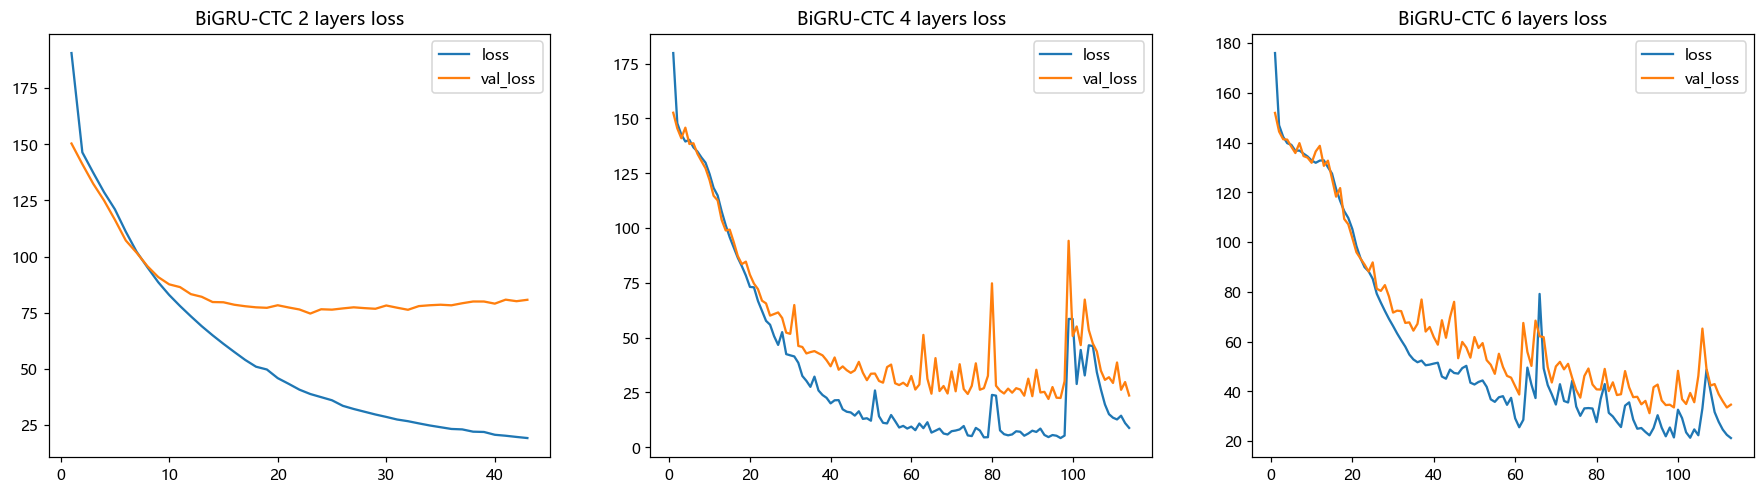

In [2]:
bigru_x2_list = list()
bigru_x2_names = ['bigru-x2-h.pkl', 'bigru-x4-h.pkl', 'bigru-x6-h.pkl']

# 读取训练记录
for history in bigru_x2_names:
    with open(dense_path + history, "rb") as file:
        bigru_x2_list.append(pickle.load(file))

plt.figure(figsize=(20, 5), dpi=110)
plt.subplots_adjust(hspace=0.4)

for index, data in enumerate(bigru_x2_list):
    epoch = len(data["loss"])
    x = range(1, epoch + 1)
    plt.subplot(1, 3, index + 1)
    plt.title("BiGRU-CTC %d layers loss" % ((index + 1) * 2))
    plt.plot(x, data["loss"])
    plt.plot(x, data["val_loss"])
    print("%.4f" % np.min(data["val_loss"]))
    plt.legend(["loss", "val_loss"])

plt.show()

7.3586
6.9937


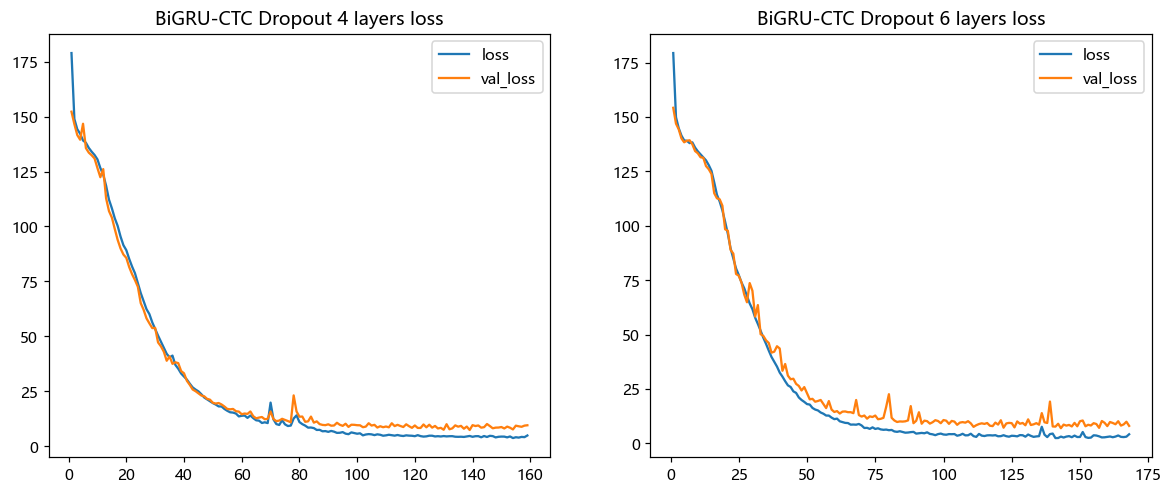

In [3]:
bigru_conv_list = list()
bigru_conv_names = ['bigru-drop-x4-h.pkl', 'bigru-drop-x6-h.pkl']

# 读取训练记录
for history in bigru_conv_names:
    with open(drop_path + history, "rb") as file:
        bigru_conv_list.append(pickle.load(file))


plt.figure(figsize=(20, 5), dpi=110)
plt.subplots_adjust(hspace=0.4)

for index, data in enumerate(bigru_conv_list):
    epoch = len(data["loss"])
    x = range(1, epoch + 1)
    plt.subplot(1, 3, index + 1)
    plt.title("BiGRU-CTC Dropout %d layers loss" % ((index + 1) * 2 + 2))
    plt.plot(x, data["loss"])
    plt.plot(x, data["val_loss"])
    print("%.4f" % np.min(data["val_loss"]))
    plt.legend(["loss", "val_loss"])

plt.show()

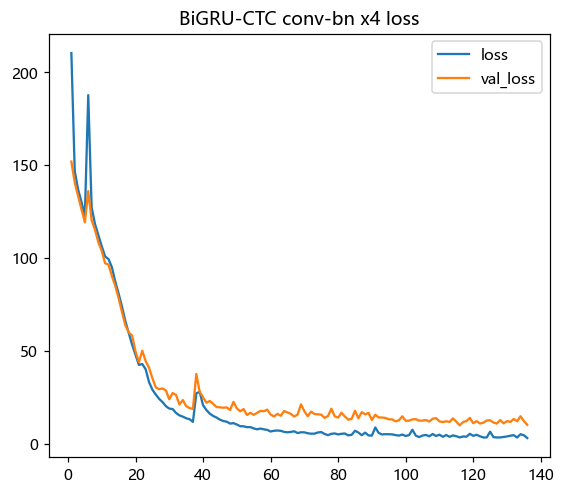

In [5]:
bigru_conv_list = list()
bigru_conv_names = ['bigru-conv-x4-h.pkl']

# 读取训练记录
for history in bigru_conv_names:
    with open(conv_path + history, "rb") as file:
        bigru_conv_list.append(pickle.load(file))


plt.figure(figsize=(20, 5), dpi=110)
plt.subplots_adjust(hspace=0.4)

for index, data in enumerate(bigru_conv_list):
    epoch = len(data["loss"])
    x = range(1, epoch + 1)
    plt.subplot(1, 3, index + 1)
    plt.title("BiGRU-CTC conv-bn x%d loss" % ((index + 1) * 2 + 2))
    plt.plot(x, data["loss"])
    plt.plot(x, data["val_loss"])
    plt.legend(["loss", "val_loss"])

plt.show()